# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [193]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise 
from skimage.filters import  gaussian
from skimage.color import rgb2gray
import commonfunctions as cf
from scipy.signal import convolve2d
%matplotlib inline
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

In [195]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

#img = rgb2gray(io.imread('circuit.tif'))



In [196]:
# 2. Custom Sobel (V-H-Both)





In [197]:
birds=imageio.imread('birds.png')
cameraman=imageio.imread('12-cameraman.png')
# bird_noise=random_noise(bird,mode='s&p',amount=0.05)
# take care from condtion as the random_noise return float img
# bird_gauss= gaussian(bird_noise,sigma=1.5)
# take care from condtion as the gauss return float img
# cf.show_images([bird,bird_noise,bird_gauss],['pure image','non pure','gaussian'])

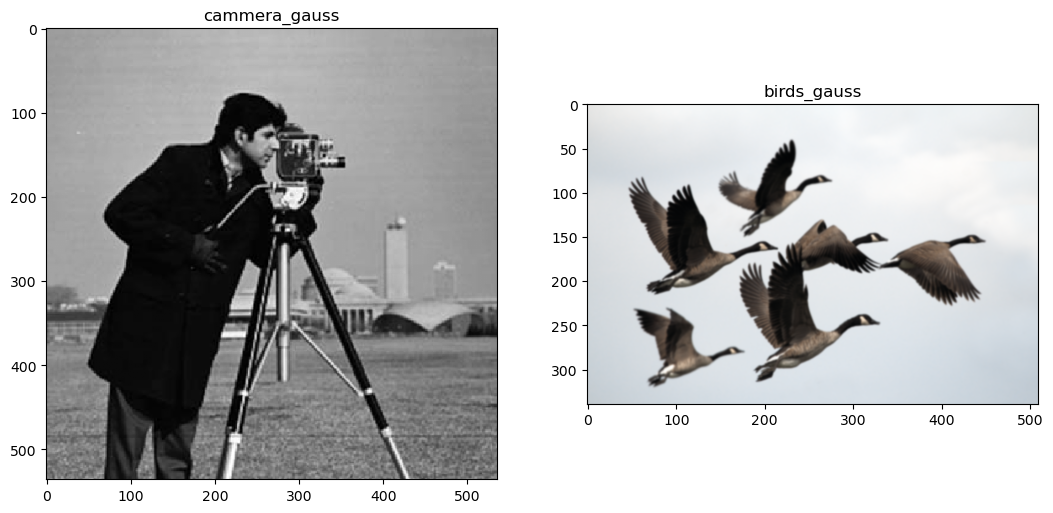

In [198]:
#make gaussian filter to reduce noise
birds_gauss= gaussian(birds,sigma=0.8)
cameraman_gauss= gaussian(cameraman,sigma=0.3)
cf.show_images([cameraman_gauss,birds_gauss],['cammera_gauss','birds_gauss'])

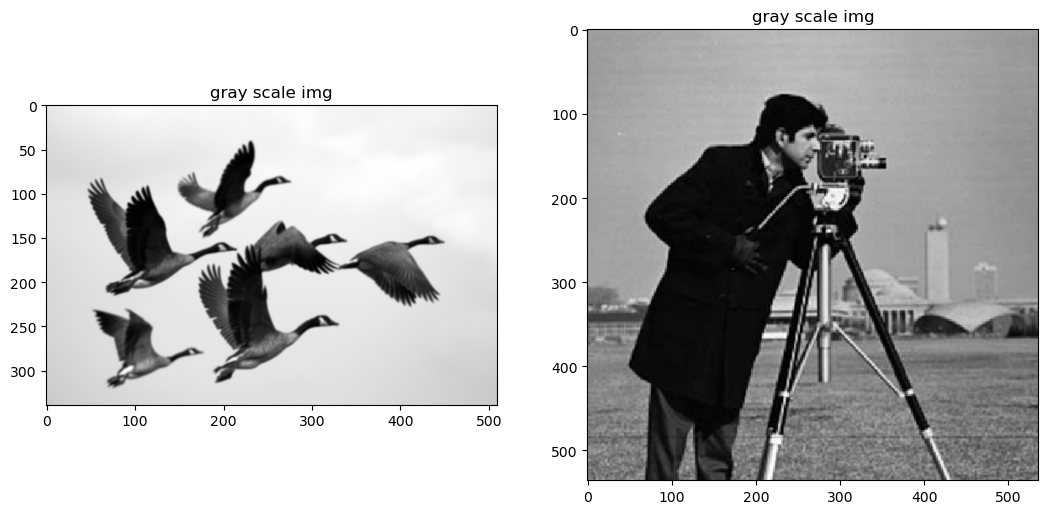

In [199]:
#convert to gray scale to work with convolve2d
birds_gray= rgb2gray(birds_gauss)
cameraman_gray=rgb2gray(cameraman_gauss)
cf.show_images([birds_gray,cameraman_gray],['gray scale img','gray scale img'])
# take care from condtion as the rgb2gray return float img

In [200]:
# 3. make convolve2d
F1= np.array([
    [-1,-1,-1],
    [-1,8,-1 ],
    [-1,-1,-1]
    ])

F2= np.array([
    [0,1,0,],
    [1,-4,1],
    [0,1,0]
    ])
F11_image=convolve2d(cameraman_gray,F1,mode='same',boundary='symm')
F12_image=convolve2d(cameraman_gray,F2,mode='same',boundary='symm')
F21_image=convolve2d(birds_gray,F1,mode='same',boundary='symm')
F22_image=convolve2d(birds_gray,F2,mode='same',boundary='symm')

In [201]:
hight1,width1=F11_image.shape
hight2,width2=F22_image.shape
binary_img11=np.zeros_like(F11_image,dtype=np.uint8)
binary_img12=np.zeros_like(F12_image,dtype=np.uint8)
binary_img21=np.zeros_like(F21_image,dtype=np.uint8)
binary_img22=np.zeros_like(F22_image,dtype=np.uint8)
thres11 = 0.3 * np.max(np.abs(F11_image))  
thres12 = 0.2 * np.max(np.abs(F12_image))
thres21 = 0.3 * np.max(np.abs(F21_image))  
thres22 = 0.2 * np.max(np.abs(F22_image))

for i in range(hight1):
    for j in range(width1):
        if(abs(F11_image[i][j])>thres11):
            binary_img11[i][j]=255
        else:
              binary_img11[i][j]=0
        if(abs(F12_image[i][j])>thres12):
            binary_img12[i][j]=255
        else:
            binary_img12[i][j]=0

for i in range(hight2):
    for j in range(width2):
        if(abs(F21_image[i][j])>thres21):
            binary_img21[i][j]=255
        else:
              binary_img21[i][j]=0
        if(abs(F22_image[i][j])>thres22):
            binary_img22[i][j]=255
        else:
            binary_img22[i][j]=0

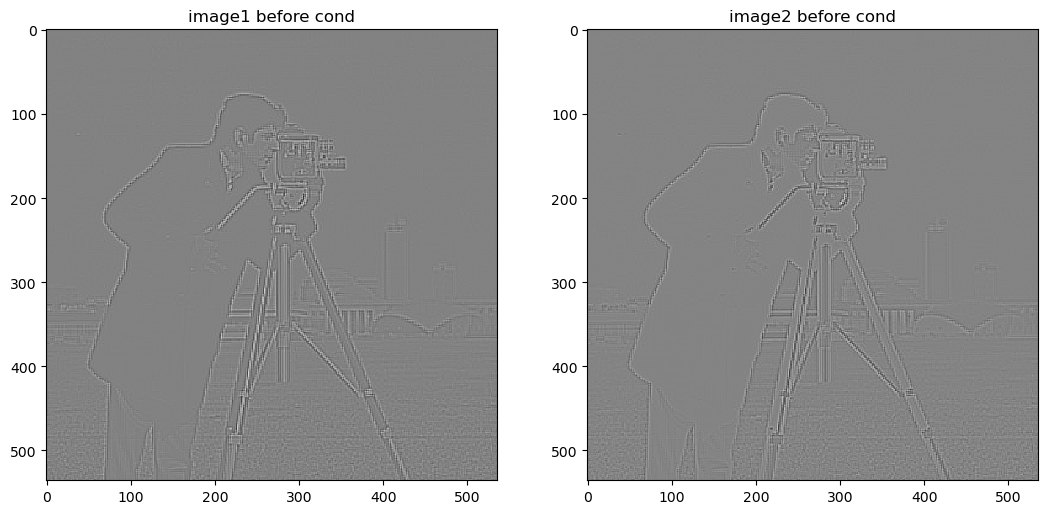

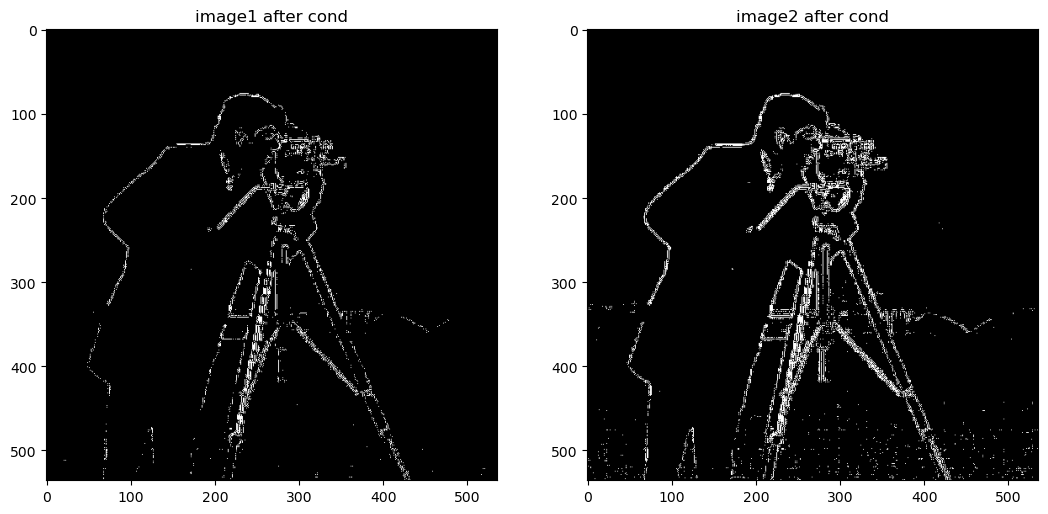

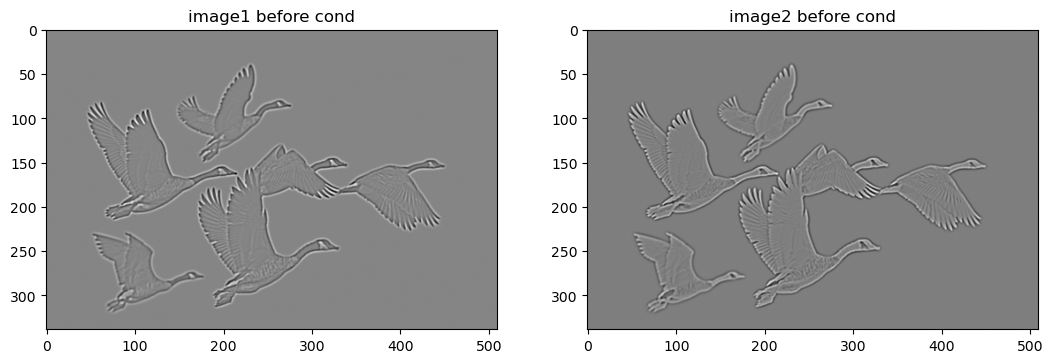

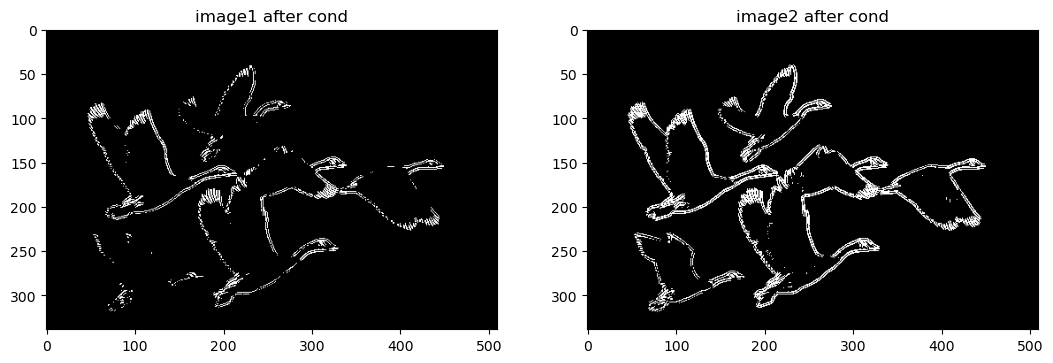

In [202]:
cf.show_images([F11_image,F12_image],['image1 before cond','image2 before cond'])
cf.show_images([binary_img11,binary_img12],['image1 after cond','image2 after cond'])
cf.show_images([F21_image,F22_image],['image1 before cond','image2 before cond'])
cf.show_images([binary_img21,binary_img22],['image1 after cond','image2 after cond'])




In [203]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'